## Business Understanding

### SMART

This analysis aims to understand the factors influencing people's income, with a focus on education and occupation. The specific objective is to identify the variables that contribute to income in order to assist in formulating better policies. This analysis is relevant for the government and stakeholders in efforts to enhance social welfare.

### Problem Statement

The problem faced in this analysis is the lack of understanding regarding the factors influencing people's income, particularly related to education and occupation. Although education is considered a primary driver of welfare, the data shows significant variations in income based on individual educational backgrounds and occupations. Currently, it is challenging for the government to formulate effective policies to enhance social and economic welfare. Therefore, in-depth research is necessary to identify other factors contributing to people's income and their impact on public policy.

> 

# ii. Import Libraries

> In this section, we are going to import libraries that will be used on this machine learning

In [1]:
#Import Library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from category_encoders import TargetEncoder
import os

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import pearsonr, chi2_contingency, randint
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from phik import phik_matrix
from scipy.stats import shapiro

-------------------

# iii. Data Loading

> Before we begin to analyze, we need to first load the data on to dataframe to make it easier to understand and processed. Then we made a copy of the dataset to ensure nothing is changed from the original dataset

In [2]:
df_ori = pd.read_csv('adult.csv')
df = df_ori.copy()

> Next, we will examine some data to get an overview of the data that will be analyzed.

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Swasta,226802,SMA (Kelas 11),7,Belum Pernah Menikah,Operator Mesin/Inspeksi,Anak Sendiri,Afrika (Hitam),Laki-Laki,0,0,40,United-States,"<=50,000,000 IDR"
1,38,Swasta,89814,Lulusan SMA,9,Menikah,Pertanian/Perikanan,Suami,Caucasian (Putih),Laki-Laki,0,0,50,United-States,"<=50,000,000 IDR"
2,28,Pemerintah Lokal,336951,Diploma Akademik,12,Menikah,Layanan Perlindungan,Suami,Caucasian (Putih),Laki-Laki,0,0,40,United-States,">50,000,000 IDR"
3,44,Swasta,160323,Sebagian Kuliah,10,Menikah,Operator Mesin/Inspeksi,Suami,Afrika (Hitam),Laki-Laki,7688,0,40,United-States,">50,000,000 IDR"
4,18,?,103497,Sebagian Kuliah,10,Belum Pernah Menikah,?,Anak Sendiri,Caucasian (Putih),Perempuan,0,0,30,United-States,"<=50,000,000 IDR"


> It's also necessary to check the columns and see if there are any values that are incorrect or need adjustment. In the snapshot above, there are several rows with the value "?", so this needs to be addressed first.

In [4]:
df.replace("?", np.nan, inplace=True) #mengganti nilai "?" dengan nilai Null untuk kepentingan analisa

# cek kembali apakah data sudah berupah
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Swasta,226802,SMA (Kelas 11),7,Belum Pernah Menikah,Operator Mesin/Inspeksi,Anak Sendiri,Afrika (Hitam),Laki-Laki,0,0,40,United-States,"<=50,000,000 IDR"
1,38,Swasta,89814,Lulusan SMA,9,Menikah,Pertanian/Perikanan,Suami,Caucasian (Putih),Laki-Laki,0,0,50,United-States,"<=50,000,000 IDR"
2,28,Pemerintah Lokal,336951,Diploma Akademik,12,Menikah,Layanan Perlindungan,Suami,Caucasian (Putih),Laki-Laki,0,0,40,United-States,">50,000,000 IDR"
3,44,Swasta,160323,Sebagian Kuliah,10,Menikah,Operator Mesin/Inspeksi,Suami,Afrika (Hitam),Laki-Laki,7688,0,40,United-States,">50,000,000 IDR"
4,18,NaN,103497,Sebagian Kuliah,10,Belum Pernah Menikah,NaN,Anak Sendiri,Caucasian (Putih),Perempuan,0,0,30,United-States,"<=50,000,000 IDR"


> Next, we will examine the information from the dataset being used.

In [5]:
#check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


> **statement** : 
- There are 15 columns with `48,842` rows of data in the dataset.
- There are missing values in the `workclass`, `occupation`, and `native-country columns`.
- The dataset consists of 9 columns with object data type and 6 columns with numerical data type.

> Next, we will check the number of unique values in each column.

In [6]:
#check unique value on each column of our dataset
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

> **Statement** :  
- **`Numerical`** :   
• age  
• fnlwgt  
• educational-num  
• capital-gain  
• capital-loss  
• hours-per-week  

- **`Ordinal`** :   
• workclass  
• education  
• marital-status  
• occupation  
• relationship  
• race  
• gender  
• income  

- **`Categorical`** :   
• native-country

Next, we will examine the basic statistical information of the numerical columns.

In [7]:
#Check statistical descriptive of numerical columns on our dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


> **Statement** : This dataset reflects a diverse population with variations in age, education, and economic activity. There are indications of extreme values, particularly in capital gain and hours per week, which need to be considered in the analysis.

> Now we also need to check if there are any duplicated data on our dataset

In [8]:
#check duplicated entries
df.duplicated().sum()

52

> We found 52 duplicated data on our dataset, so we will proceed to removed them since duplicated data will disrupt our machine learning performances

In [9]:
#remove duplicated entry from our dataset
df.drop_duplicates(inplace=True)

In [10]:
#recheck to make sure duplicated entry have been dealt with
df.duplicated().sum()

0

> Now we need to see if there's some missing value on our dataset, this is important to analyze our dataset

In [11]:
#Missing value check
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

> We found that `workclass`, `occupation`, and `native-country` have some missing value on them, we need to handle them, but we'll do it on Feature Engineering.  
> Now we're going to rename the columns on our dataset based on my own preferences to make it easier for me to understand the value

In [12]:
#Rename columns
columns_translation = {
    'age': 'usia',
    'workclass': 'jenis_pekerjaan',
    'fnlwgt': 'bobot_sampel',
    'education': 'pendidikan',
    'educational-num': 'angka_pendidikan',
    'marital-status': 'status_perkawinan',
    'occupation': 'pekerjaan',
    'relationship': 'hubungan',
    'race': 'ras',
    'gender': 'jenis_kelamin',
    'capital-gain': 'keuntungan_modal',
    'capital-loss': 'kerugian_modal',
    'hours-per-week': 'jam_kerja',
    'native-country': 'negara_asal',
    'income': 'pendapatan'
}

# Rename columns in the DataFrame
df.rename(columns=columns_translation, inplace=True)

-------------------

# Exploratory Data Analysis (EDA)

In this section, we're going to Analyze our data distribution, correlation, and analyze initial pattern for our machine learning

> First, we're going to see age distribution on our dataset

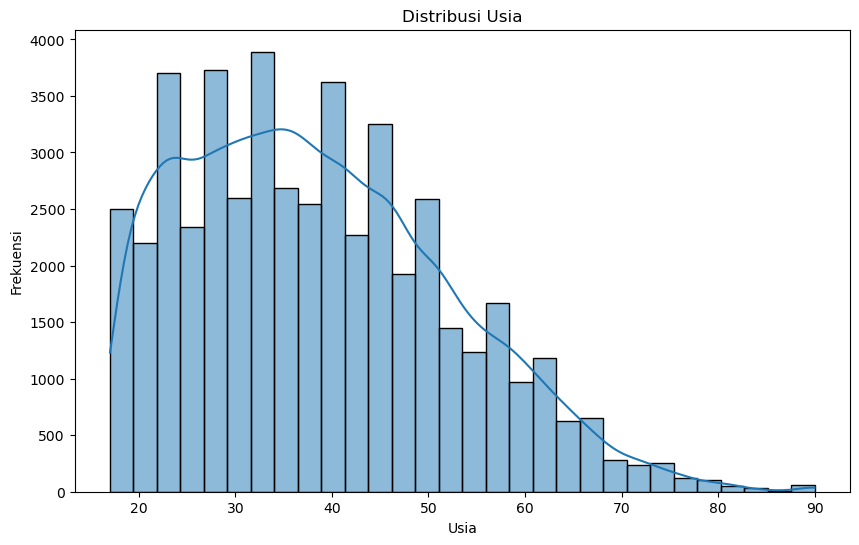

In [13]:
#Historgam of Age distribution throughout our dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['usia'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

> **Statement** :  
- The majority of population on our dataset appears to be between 20-50 age range, and the peak is between 30-35 years old. This suggest a concentraion of middle-aged individuals  
- Age Distribution is right-skewed, this suggest there are less individuals in older age-ranges
- There are notable spikes on 20-30 age range, indicating a substantial representation of young adults on our dataset

> Now we want to find out the age distribution based on income

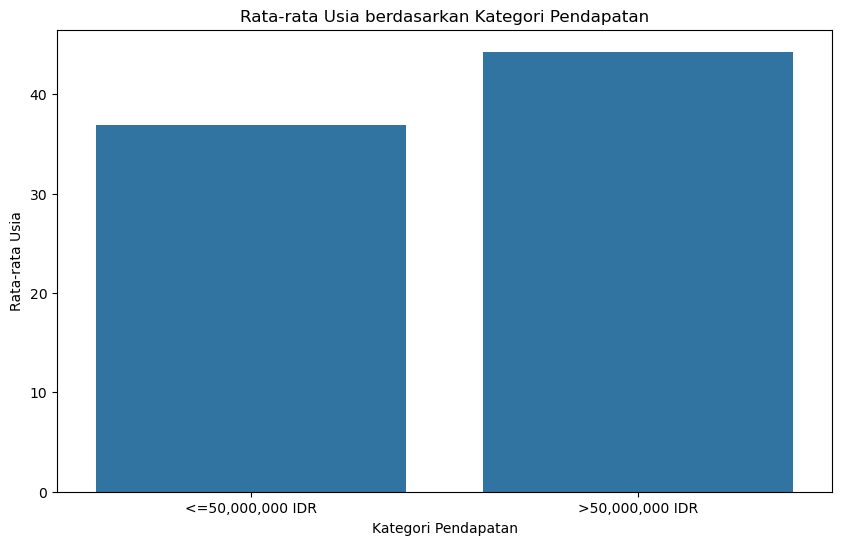

In [14]:
age_income = df.groupby('pendapatan')['usia'].mean().reset_index() #group usia by pendapatan

#Barplot visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=age_income, x='pendapatan', y='usia')
plt.title('Rata-rata Usia berdasarkan Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Rata-rata Usia')
plt.show()


> **Statement** :  
- Invididual who earned more than 50.000.000 IDR tends to be older, with average age slightly above 40 years old. 
- This trend suggest that older individual tend to have higher income, which could be attributed to career progression, experience, and seniority

> Now we are going to see whether their workclass have any correlation with their incomes

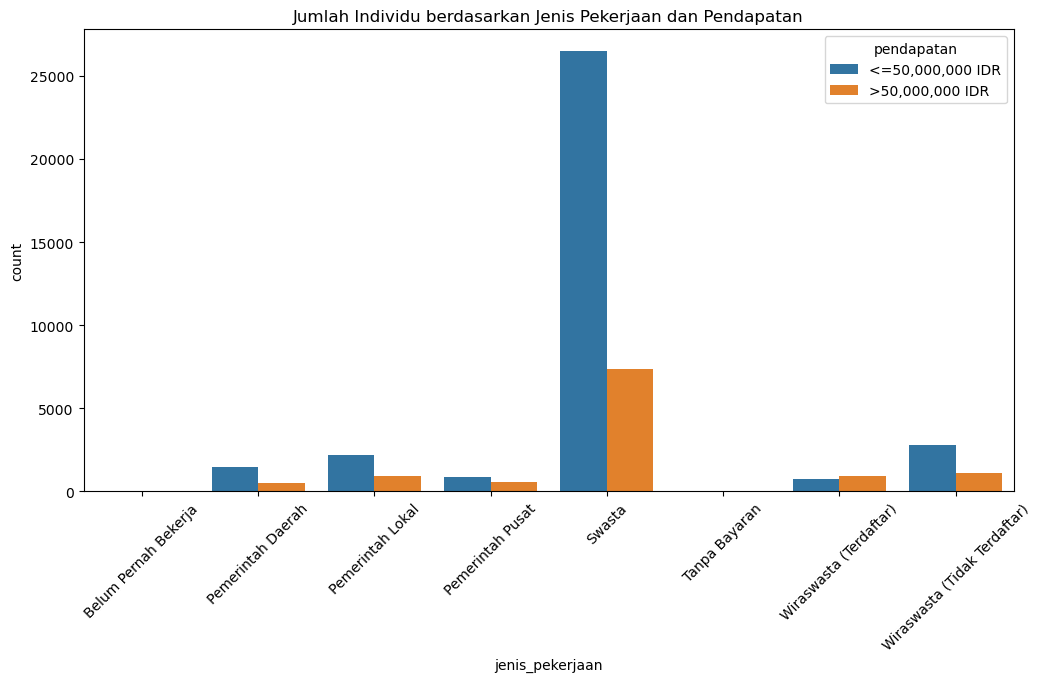

In [15]:
workclass_income = df.groupby(['jenis_pekerjaan', 'pendapatan']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=workclass_income, x='jenis_pekerjaan', y='count', hue='pendapatan')
plt.title('Jumlah Individu berdasarkan Jenis Pekerjaan dan Pendapatan')
plt.xticks(rotation=45)
plt.show()

> **Statement** :  
- Majority of individuals fall into "Swasta" (private sector) category, with a significant proportion earning less than equal 50 Mio IDR, howerver, there is also a considerable number of high-income earners in this category
- There is a notable representation of entrepreneurs (Wiraswasta), both registered and non-registered. However, most entrepreneurs seem to fall into the lower income category, though there is some presence in the higher income category  
- government-related jobs have relatively low counts compared to the private sector. These position also have a mix of both low and high-income individuals, although high-income earners are fewer in comparison
- Individuals who have never worked or are without pay mostly fall in the lower income category, as expected.

> Distribusi keuntungan modal berdasarkan pendidikan

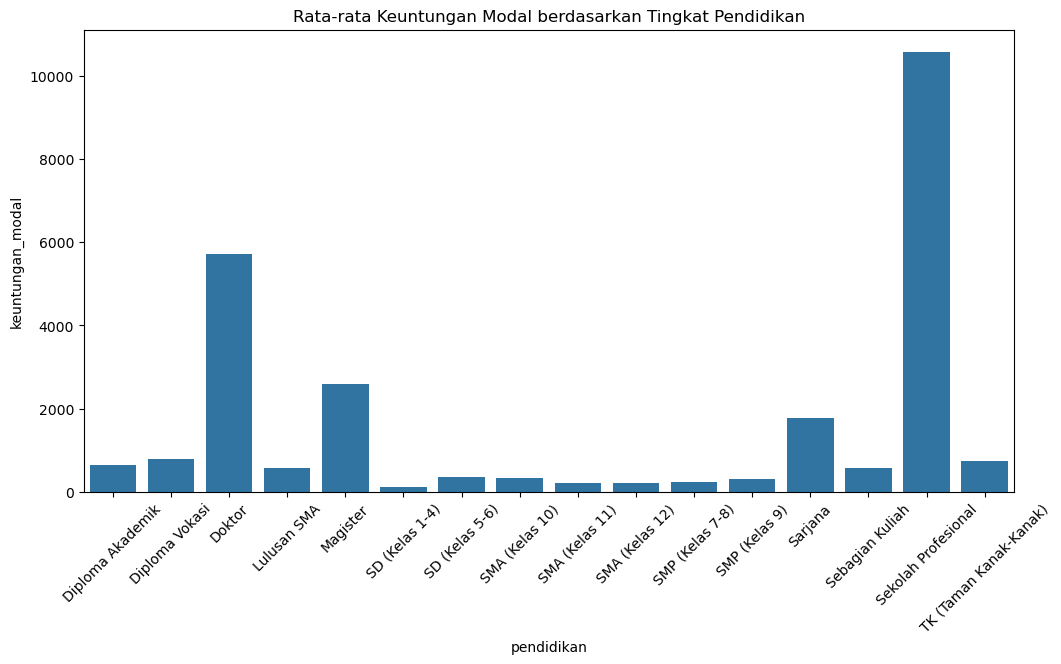

In [16]:
capital_gain_education = df.groupby('pendidikan')['keuntungan_modal'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=capital_gain_education, x='pendidikan', y='keuntungan_modal')
plt.title('Rata-rata Keuntungan Modal berdasarkan Tingkat Pendidikan')
plt.xticks(rotation=45)
plt.show()

> **Statement** :  
- People with Docorate and Master's degrees show significantly higher average capital profits compared to other educational levels, especially the Doctorate level, which peaks at over 6000 units
- Sekolah Professional also shows one of the highest capital profits, suggesting that vocational training or professional education is a strong indicator of higher capital gains
- Individuals with primary school education and secondary education show very low average capital profits across all their subcategories. This indicates that lower educational attainment correlates with less capital profit
- Bachelor's degree holder and vocational diploma holders somehow show very low average profits compared to doctorate and professional school categories, suggesting that advanced academic or professional specialization might have a strong impact on capital gains than just having a bachelor's degree
- Sebagian kuliah is another notable outlier with a spike in capital profit, though the exact reason might require further investigation into why individuals in this category are performing exceptionally well

> Now we need to see if working hours generate more incomes?

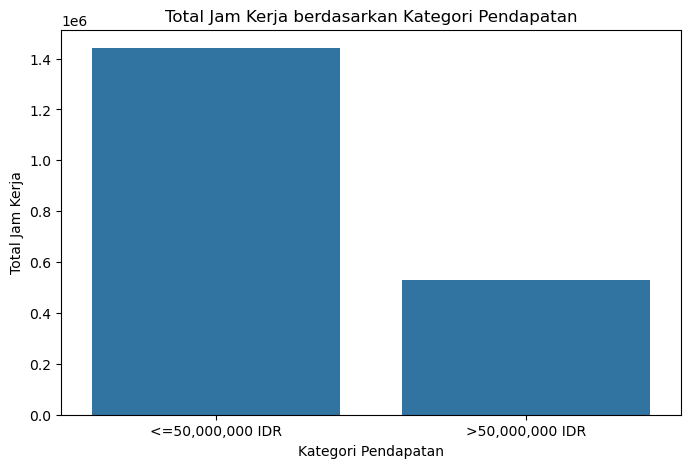

In [17]:
hours_income = df.groupby('pendapatan')['jam_kerja'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=hours_income, x='pendapatan', y='jam_kerja')
plt.title('Total Jam Kerja berdasarkan Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Total Jam Kerja')
plt.show()

> **Statement** :  
- this chart suggest that people with lower incomes tend to work more hours, possibly indicating that they need to put in more time to generate their earning, while higher-income individuals may either work fewer hours or benefit from more efficient use of their time. 

> We are going to see if one's marriage status have any effect on one's income

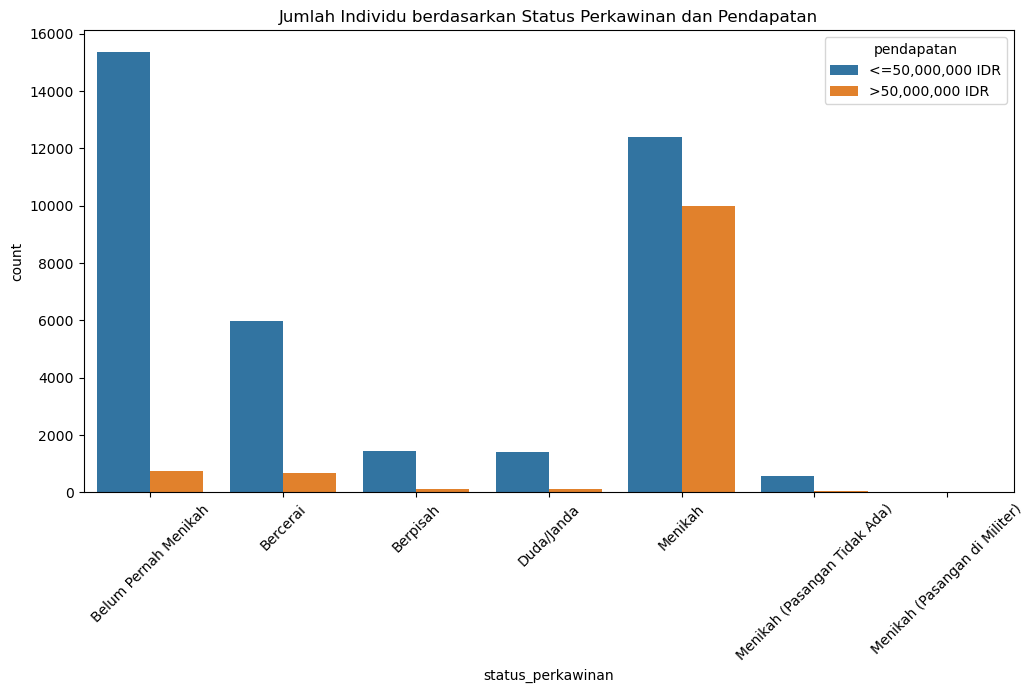

In [18]:
relationship_income = df.groupby(['status_perkawinan', 'pendapatan']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=relationship_income, x='status_perkawinan', y='count', hue='pendapatan')
plt.title('Jumlah Individu berdasarkan Status Perkawinan dan Pendapatan')
plt.xticks(rotation=45)
plt.show()

> **Statement** :  
- There's a noticeable concentration of individuals with less than 50 mio IDR income across all marital statuses, especially among those who have never married, divorced, or are separated. However, the number of higher income earners is most prominent in the married category, suggesting that marriage may have some correlation with higher income or dual-income households  
- the "married" category stands out with the highest count of individuals earning more than 50 mio IDR, possibly reflecting that couples can combine incomes or that higher earners are more likely to be married.

> Mencari korelasi antara kolom

interval columns not set, guessing: ['usia', 'bobot_sampel', 'angka_pendidikan', 'keuntungan_modal', 'kerugian_modal', 'jam_kerja']


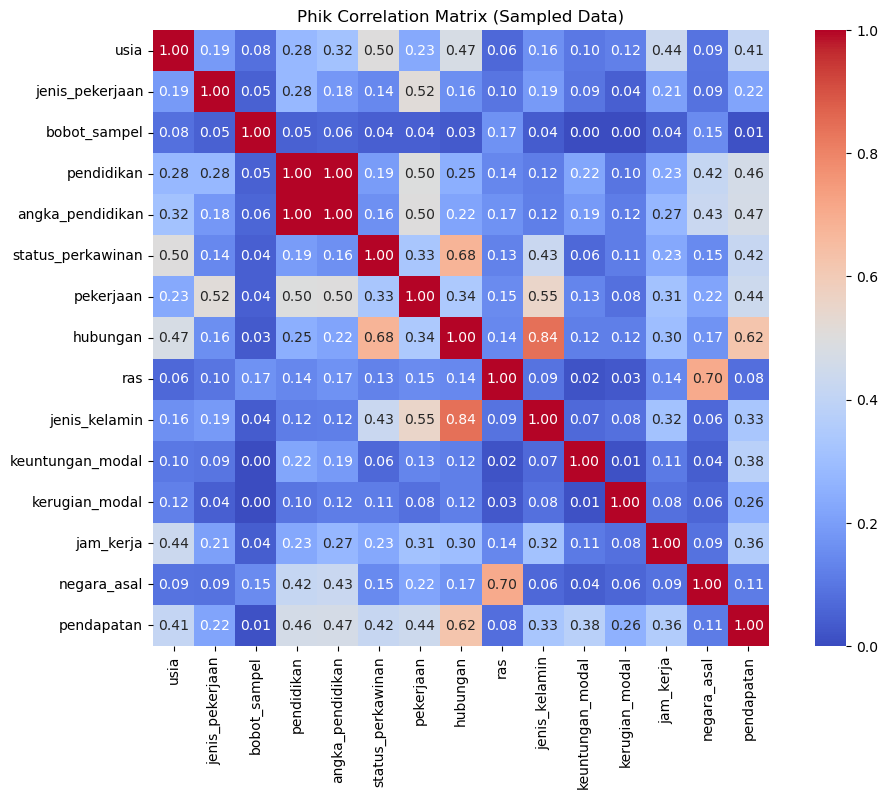

In [19]:
phik_corr = df.phik_matrix()
plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Phik Correlation Matrix (Sampled Data)')
plt.show()

**Statements :**  
- There's a strong correlation between gender and relationship status, this could indicate that certain genders have a tendency to have certain relationship statuses
- gender also show a strong correlation with marital status, possibly due to traidional gender roles influencing marriage rates
- There's a high correlation between relationship and marital status, which makes sense as these two concepts are closely linked.
- income appears to be moderately correlated with relatinoship status, possibly indicating that financial stability affects relationships.
- There is a moderate correlation between job type and employment, which is reasonable since the nature of someons's job likely determines their employment situation
- Race appears to have little to no relationship with capital gains in this dataset


In [20]:
#Imbalance Check
class_distribution = df['pendapatan'].value_counts()
print(class_distribution)

pendapatan
<=50,000,000 IDR    37109
>50,000,000 IDR     11681
Name: count, dtype: int64


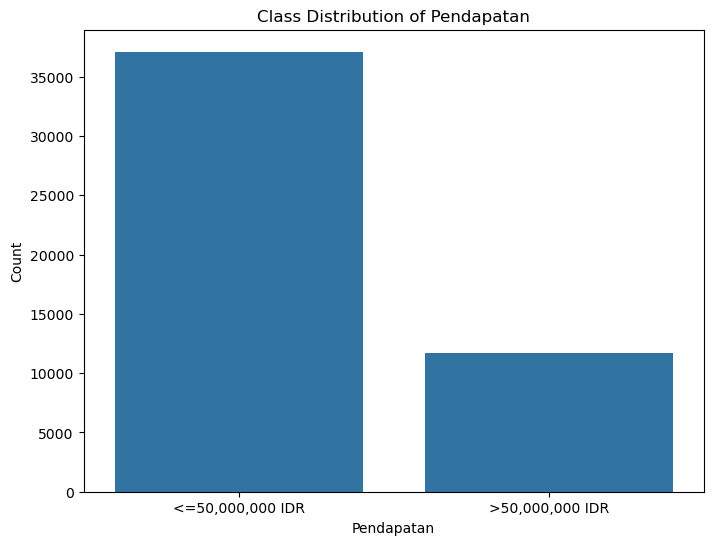

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pendapatan', data=df)
plt.title('Class Distribution of Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.show()

##### Insight : 
- There is a significant imbalance between the two income groups, with the majority of individuals earning less than or equal to 50 million IDR  
- This distribution might suggest income inequality in the population being studied, with relatively fewer individuals in the higher income bracket.


**Rekomendasi :**  
- Educational attainment appears to be a crucial driver of income. Policies aimed at improving access to quality education (especially higher education) could help reduce income inequality over time. This could involve increasing funding for education, offering scholarships, or promoting vocational training programs to increase skills in lower-income groups
- Consider investigating the gender pay gap more deeply to understand the underlying cause. Implementing policies that promote equal pay for equal work, as well as providing job opportunities and skill training for women, may help to close this gap.
- Income support policies might need to account for family structures.

-------------------

# v. Feature Engineering

> In this section, we will start to analyze the dataset, pre-processing our data to improve model's performance.

## Split Feature and Target


We need to first define our target, and drop that column from x, we also need to change our target's value from Categorical, into binary (0, 1)

In [22]:
#memisahkan kolom feature dan target
x = df.drop(['pendapatan', 'angka_pendidikan'], axis=1) #drop 'pendapatan' since it's our target, and 'angka_pendidikan" because it have the same value with 'pendidikan', but in numerical
y = df['pendapatan'].map({'<=50,000,000 IDR': 0, '>50,000,000 IDR': 1}) #define our target, and replace it's value into binary (0,1)
x.head()

,usia,jenis_pekerjaan,bobot_sampel,pendidikan,status_perkawinan,pekerjaan,hubungan,ras,jenis_kelamin,keuntungan_modal,kerugian_modal,jam_kerja,negara_asal
0,25,Swasta,226802,SMA (Kelas 11),Belum Pernah Menikah,Operator Mesin/Inspeksi,Anak Sendiri,Afrika (Hitam),Laki-Laki,0,0,40,United-States
1,38,Swasta,89814,Lulusan SMA,Menikah,Pertanian/Perikanan,Suami,Caucasian (Putih),Laki-Laki,0,0,50,United-States
2,28,Pemerintah Lokal,336951,Diploma Akademik,Menikah,Layanan Perlindungan,Suami,Caucasian (Putih),Laki-Laki,0,0,40,United-States
3,44,Swasta,160323,Sebagian Kuliah,Menikah,Operator Mesin/Inspeksi,Suami,Afrika (Hitam),Laki-Laki,7688,0,40,United-States
4,18,NaN,103497,Sebagian Kuliah,Belum Pernah Menikah,NaN,Anak Sendiri,Caucasian (Putih),Perempuan,0,0,30,United-States


In [23]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: pendapatan, dtype: int64

Once we split our feature and target, we'll handle our missing value before we go further into analysis

## Missing Value


In [24]:
#check how many missing value there are on our dataset
missing_value = x.isnull().sum() #find missing value on x, save it as missing value variables
missing_percentage = (missing_value / len(df)) * 100 #shows the total of missing values in percentage

#turn missing_data info dataframe to make it easier to understand
missing_data = pd.DataFrame({
    'Missing Values': missing_value,
    'Percentage':missing_percentage
})

print (missing_data[missing_data['Missing Values'] > 0])

                 Missing Values  Percentage
jenis_pekerjaan            2795    5.728633
pekerjaan                  2805    5.749129
negara_asal                 856    1.754458


> **Statement** :
- We find that `jenis_pekerjaan` and `pekerjaan` have missing value above 5%, we need to handle this to improve our model's performance

### Missing Value Handling

In [25]:
#fill empty value on columns with mode value of each column
x['jenis_pekerjaan'] = x['jenis_pekerjaan'].fillna(x['jenis_pekerjaan'].mode()[0])
x['pekerjaan'] = x['pekerjaan'].fillna(x['pekerjaan'].mode()[0])
x['negara_asal'] = x['negara_asal'].fillna(x['negara_asal'].mode()[0])

x.isnull().sum() #recheck to see if there are still missing values on our dataset

usia                 0
jenis_pekerjaan      0
bobot_sampel         0
pendidikan           0
status_perkawinan    0
pekerjaan            0
hubungan             0
ras                  0
jenis_kelamin        0
keuntungan_modal     0
kerugian_modal       0
jam_kerja            0
negara_asal          0
dtype: int64

## Split Train and Test

In [26]:
#splitting x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #we'll split 20% data for test, and 80% data to train the machine learning

print (f"Train size : {x_train.shape}")
print (f"Test size : {x_test.shape}")

Train size : (39032, 13)
Test size : (9758, 13)


## Outlier

In [27]:

#get numerical columns, and making sure thera are no 'object' data types on num_cols
num_cols = [col for col in x_train.select_dtypes(exclude='object').columns]

#Skewness check
skewness = pd.DataFrame({
    'column name':num_cols,
    'skewness_score': [round(x_train[col].skew(), 1) for col in num_cols],
    'distribution': ['normal' if -0.5 <= round(x_train[col].skew(), 1) <= 0.5 else 'skewed' for col in num_cols] #if score is bigger than or equal to -0.5 and less than or equal to 0.5, then it's normally distributed
})

skewness

,column name,skewness_score,distribution
0,usia,0.5,normal
1,bobot_sampel,1.4,skewed
2,keuntungan_modal,11.6,skewed
3,kerugian_modal,4.6,skewed
4,jam_kerja,0.3,normal


We could see that 4 out of 5 numerical column are skewed

In [28]:
#make a function to analyze lower and upper boundary for numerical column
def hitung_limit(col, distype):
    if distype == 'skewed':
        IQR = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
        lower = x_train[col].quantile(0.25) - (IQR * 3)
        upper = x_train[col].quantile(0.75) + (IQR * 3)
    else:
        lower = x_train[col].mean() - 3*x_train[col].std()
        upper = x_train[col].mean() + 3*x_train[col].std()
    return lower, upper

#finds outlier and show the number of percentage of them
outliers = pd.DataFrame({
    'column':skewness['column name'],
    'distribution':skewness['distribution'],
    'lower_boundary':[round(hitung_limit(col, distype)[0],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'upper_boundary':[round(hitung_limit(col, distype)[1],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'persentase':[
        round(((x_train[col] > upper).sum() + (x_train[col] < lower).sum()) / len(x_train) *100, 2)
        for col, dist in zip(skewness['column name'], skewness['distribution'])
        for lower, upper in [hitung_limit(col, dist)]
    ]
})
outliers

,column,distribution,lower_boundary,upper_boundary,persentase
0,usia,normal,-2.38,79.77,0.36
1,bobot_sampel,skewed,-242536.00,598171.00,0.46
2,keuntungan_modal,skewed,0.00,0.00,8.35
3,kerugian_modal,skewed,0.00,0.00,4.70
4,jam_kerja,normal,3.16,77.75,1.44


`keuntungan_modal` have over 5% outliers, while the rest of numerical column have outlier below 5%

### Outlier Handling

In [29]:
#Now we need to define our categorical column with skewed distribution
col_outlier = ['bobot_sampel','keuntungan_modal','kerugian_modal','jam_kerja']
dist_types = ['skewed','skewed','skewed','skewed']

#loop to handle outlier on each column
for col, dist in zip(col_outlier, dist_types):
    lower, upper = hitung_limit(col, dist)
    x_train[col] = x_train[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

In [30]:
#recheck outliers 
def hitung_limit(col, distype):
    if distype == 'skewed':
        IQR = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
        lower = x_train[col].quantile(0.25) - (IQR * 3)
        upper = x_train[col].quantile(0.75) + (IQR * 3)
    else:
        lower = x_train[col].mean() - 3*x_train[col].std()
        upper = x_train[col].mean() + 3*x_train[col].std()
    return lower, upper

#finds outlier and show the number of percentage of them
outliers = pd.DataFrame({
    'column':skewness['column name'],
    'distribution':skewness['distribution'],
    'lower_boundary':[round(hitung_limit(col, distype)[0],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'upper_boundary':[round(hitung_limit(col, distype)[1],2) for col, distype in zip(skewness['column name'], skewness['distribution'])],
    'persentase':[
        round(((x_train[col] > upper).sum() + (x_train[col] < lower).sum()) / len(x_train) *100, 2)
        for col, dist in zip(skewness['column name'], skewness['distribution'])
        for lower, upper in [hitung_limit(col, dist)]
    ]
})
outliers

,column,distribution,lower_boundary,upper_boundary,persentase
0,usia,normal,-2.38,79.77,0.36
1,bobot_sampel,skewed,-242536.00,598171.00,0.00
2,keuntungan_modal,skewed,0.00,0.00,0.00
3,kerugian_modal,skewed,0.00,0.00,0.00
4,jam_kerja,normal,13.57,68.11,0.00


Now we have no outlier on numerical column

## Feature Selection

This section is where we pick out features based on it's correlation with target column

First we need to make sure our data is normally distributed

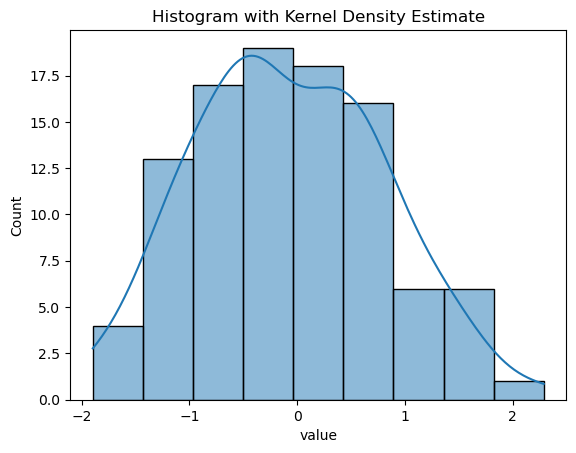

Statistic: 0.9887179153237003, p-value: 0.562545623031231
Data is normally distributed (fail to reject H0)


In [31]:
#Normality test
data = np.random.normal(loc=0, scale=1, size=100)  # Generate normally distributed data
normality_df = pd.DataFrame(data, columns=['value'])

# Visualize the distribution
sns.histplot(normality_df['value'], kde=True)
plt.title('Histogram with Kernel Density Estimate')
plt.show()

# Check for normality
stat, p_value = shapiro(normality_df['value'])
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

Now we know that our dataset is normally distributed, so we can move to choosing columns for feature

In [32]:
# Split the column based on data types
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Numerical columns
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()  # Categorical columns

results = []  # Empty list to save our correlation analysis result

# For numerical columns, check for constant values before calculating correlation
for col in num_cols:
    if x_train[col].nunique() > 1:  # Check if the column has more than one unique value
        p_value = pearsonr(x_train[col], y_train)[1]
        p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    else:
        p_value_text = 'Not Correlated'  # Indicate that the input is constant
    results.append((col, p_value_text))

# For categorical columns, we'll use chi-square to find the correlation
for col in cat_cols:
    contingency_table = pd.crosstab(x_train[col], y_train)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    results.append((col, p_value_text))

# Save the result into a DataFrame for easier reading
result_df = pd.DataFrame(results, columns=['Column Name', 'Result'])
result_df

,Column Name,Result
0,usia,Correlated
1,bobot_sampel,Not Correlated
2,keuntungan_modal,Not Correlated
3,kerugian_modal,Not Correlated
4,jam_kerja,Correlated
5,jenis_pekerjaan,Correlated
6,pendidikan,Correlated
7,status_perkawinan,Correlated
8,pekerjaan,Correlated
9,hubungan,Correlated


we found that only 3 columns (`bobot_sampel`, `keuntungan_modal`,`kerugian_modal`) that doesn't have any correlation with income, so we will exclude this columns from feature

In [33]:
x_train = x_train.drop(columns=['bobot_sampel','keuntungan_modal','kerugian_modal'])
x_test = x_test.drop(columns=['bobot_sampel','keuntungan_modal','kerugian_modal'])

Now we need to do cardinality check to make sure we implement the right encoding 

## Cardinality Check

In [34]:
categorical_columns = [
    'jenis_pekerjaan',
    'pendidikan',
    'status_perkawinan',
    'pekerjaan',
    'hubungan',
    'ras',
    'jenis_kelamin',
    'negara_asal',
    'pendapatan'
]

# Check cardinality of each categorical column
cardinality = {col: df[col].nunique() for col in categorical_columns}

# Print the cardinality results
for col, count in cardinality.items():
    print(f"Cardinality of '{col}': {count} unique values")

Cardinality of 'jenis_pekerjaan': 8 unique values
Cardinality of 'pendidikan': 16 unique values
Cardinality of 'status_perkawinan': 7 unique values
Cardinality of 'pekerjaan': 14 unique values
Cardinality of 'hubungan': 6 unique values
Cardinality of 'ras': 5 unique values
Cardinality of 'jenis_kelamin': 2 unique values
Cardinality of 'negara_asal': 41 unique values
Cardinality of 'pendapatan': 2 unique values


Low Cardinality : `jenis_kelamin`, `pendapatan`  -> `pendapatan` is the target, so we will ignore this column, and do OneHotEncoder for `jenis_kelamin`  
Medium Cardinality : `jenis_pekerjaan`, `status_perkawinan`, `hubungan`, `ras`  -> these columns will be encoded using OneHotEncoder  
High Cardinality : `pendidikan`, `negara_asal`  -> this column will be encoded using TargetEncoder  

Since we're going to use pipeline, high cardinality column will be handled on pipeline creation section



## Split numerical, kategorical and High Cardinality column

Now, to make sure the column are scaled or encoded correctly, we are going to split the column based on scaler or encoder we'll be using

In [35]:
high_car = ['negara_asal','pendidikan','pekerjaan'] #these column will be encoded using TargetEncoder
num_cols = ['usia','jam_kerja'] #these columns will be scaled using StandardScaler
cat_cols = ['jenis_pekerjaan','status_perkawinan','hubungan','ras','jenis_kelamin'] #These columns will be encoded using OneHotEncoder

all_cat_cols = high_car + cat_cols #combine high_car and cat_cols since both are categorical, use this column to get it's index on x_train

categorical_indices = [x_train.columns.get_loc(col) for col in all_cat_cols] #get index number of categorical column

#Preprocessor will be used on pipeline as the first of action when our that is processed on pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), num_cols),
        ('high_car', TargetEncoder(), high_car),
        ('cat',OneHotEncoder(), cat_cols)
    ], remainder='passthrough'
)


-------------------

# vi. Model Definition

In this section, we will define the model we're going to use. But we need to find the best performance model by doing test using KNN, SVM, Decision Tree, Random Forest, and Boosting (AdaBoost)

In [36]:
#this is where we defined our algorithm for test
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier(
    #estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

> KNN

In [37]:
#this is the pipeline for KNN Algorithm
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), #scaling, and encoding column that we've defined previously
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), #Our dataset are imbalanced, so we need to balanced them using SMOTENC
    ('classifier', knn) #This is where we define the classifier we'll be using
])

> SVM

In [38]:
#this is the pipeline for SVM Algorithm
svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), #scaling, and encoding column that we've defined previously
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), #Our dataset are imbalanced, so we need to balanced them using SMOTENC
    ('classifier', svm) #This is where we define the classifier we'll be using
])

> Decision Tree

In [39]:
#this is the pipeline for Decision Tree Algorithm
dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), #scaling, and encoding column that we've defined previously
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), #Our dataset are imbalanced, so we need to balanced them using SMOTENC
    ('classifier', decision_tree) #This is where we define the classifier we'll be using
])

>RandomForest

In [40]:
#This is the pipeline for Random Forest Algorithm
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), #scaling, and encoding column that we've defined previously
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), #Our dataset are imbalanced, so we need to balanced them using SMOTENC
    ('classifier', random_forest) #This is where we define the classifier we'll be using
])

>AdaBoost Classifier (Boosting)

In [41]:
#This is the pipeline for Boosting (Adaboost)
ada_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), #scaling, and encoding column that we've defined previously
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)), #Our dataset are imbalanced, so we need to balanced them using SMOTENC
    ('classifier', adaboost) #This is where we define the classifier we'll be using
])

## Hyperparameter RandomizedSearchCV

In [42]:
# Define the parameter grid for AdaBoost
param_grid_ada = {
    'classifier__n_estimators': randint(50, 500),  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],  # Learning rate that shrinks the contribution of each classifier
    'classifier__algorithm': ['SAMME']  # The boosting algorithm to use (SAMME or SAMME.R)
}

# Set the scoring metric
score = ['f1']

# RandomizedSearchCV for AdaBoost
random_search = RandomizedSearchCV(
    ada_pipeline,
    param_distributions=param_grid_ada,
    n_iter=50,
    scoring=score,
    refit='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)


-------------------

# vii. Model Training

In this section, we're going to train our machine learning using the algorithm we've defined previously

First, we'll run some test on each model, then we'll do cross-validation to find the `mean` and `std` value of our f1-score

## Tanpa Hyperparameter

> KNN

In [43]:
knn_pipeline.fit(x_train, y_train) #fit KNN pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier', KNeighborsClassifier())])

>SVM

In [44]:
svm_pipeline.fit(x_train, y_train) #fit SVM Pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier', SVC())])

> Decision Tree

In [45]:
dt_pipeline.fit(x_train, y_train) #fit decision tree pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier', DecisionTreeClassifier())])

> RandomForest

In [46]:
rf_pipeline.fit(x_train, y_train) #fit random forest pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier', RandomForestClassifier())])

In [47]:
ada_pipeline.fit(x_train, y_train) #fit adaboost pipeline into x_train and y_train

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', random_state=42))])

## Dengan Hyperparameter

This section is where we run the best model using Hyperparameter. This section is to be processed after we found the best model

#### Randomized Search CV

In [48]:
random_search.fit(x_train, y_train) #fit RandomSearchCV into x_train and y_train to find the best parameter

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['usia',
                                                                                'jam_kerja']),
                                                                              ('high_car',
                                                                               TargetEncoder(),
                                                                               ['negara_asal',
                                                                                'pendidikan',
                                                                                'pekerjaan']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['jenis_pekerjaan',
                                                                                'status_perkawinan',
                                                                                'hubungan',
                                                                                'ras',
                                                                                'jenis_kelamin'])])),
                                             ('smote',
                                              SM...
                                                      random_state=42)),
                                             ('classifier',
                                              AdaBoostClassifier(algorithm='SAMME',
                                                                 random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__algorithm': ['SAMME'],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.5, 1.0,
                                                                      1.5],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000223B56CA300>},
                   random_state=42, refit='f1', scoring=['f1'])

In [49]:
best_params_rs = random_search.best_params_
best_score_rs = random_search.best_score_

print (f"Best Hyperparameter : {best_params_rs}")
print (f"Best Score : {best_score_rs}")

Best Hyperparameter : {'classifier__algorithm': 'SAMME', 'classifier__learning_rate': 1.5, 'classifier__n_estimators': 329}
Best Score : 0.6628453593108056


In [50]:
best_result_rs = random_search.best_estimator_
best_result_rs

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['usia', 'jam_kerja']),
                                                 ('high_car', TargetEncoder(),
                                                  ['negara_asal', 'pendidikan',
                                                   'pekerjaan']),
                                                 ('cat', OneHotEncoder(),
                                                  ['jenis_pekerjaan',
                                                   'status_perkawinan',
                                                   'hubungan', 'ras',
                                                   'jenis_kelamin'])])),
                ('smote',
                 SMOTENC(categorical_features=[9, 2, 4, 1, 3, 5, 6, 7],
                         random_state=42)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5,
                                    n_estimators=329, random_state=42))])

Now that we got the result of hyperparameter tuning, we'll start to do model evaluation

-------------------

# viii. Model Evaluation

In this section, we'll evaluate the performance of our models. First we'll find base performance without hyperparameter tuning. Once we find which model have the best performance,
we'll run the test again using hyperparameter tuning

## Without Hyperparameter

> KNN Without Hyper Parameter

In [51]:
y_pred = knn_pipeline.predict(x_test) #this predicts the target variable using the test feature
report_knn = classification_report(y_test,y_pred, output_dict=True, zero_division=0) #generate a classification report to evalute the KNN Model
f1_score_base_knn = report_knn['weighted avg']['f1-score'] #access the weighted average F1-Score from the report
 
#perform cross-validation on KNN model to get more robust f1-score
cv_result_knn = cross_validate(
    knn_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_knn = cv_result_knn['test_f1_weighted'] #extract f1-score from cross-validation
mean_f1_knn = f1_score_knn.mean() #find the average (mean) f1-score from cross-validation
std_f1_knn = f1_score_knn.std()#find the standard deviation of f1-score from cross-validation

#create summary dataframe to store KNN evaluation result
summary_knn = pd.DataFrame({
    'Model Name' : ['Model KNN'],
    'Classifier' : ['KNeighbors'],
    'F1-Score Base' : [f1_score_base_knn],
    'F1-Score Cross Validation (Mean)' : [mean_f1_knn],
    'F1-Score Cross Validation (Std)' : [std_f1_knn]
})

summary_knn

,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model KNN,KNeighbors,0.795778,0.794755,0.003657


> SVM without Hyperparameter

In [52]:
y_pred = svm_pipeline.predict(x_test) #this predicts the target variable using the test feature
report_svm = classification_report(y_test, y_pred, output_dict=True, zero_division=0) #generate a classification report to evaluate the SVM Model
f1_score_base_svm = report_svm['weighted avg']['f1-score'] #access the weighted average F1-Score from the report

#perform cross-validation on SVM model to get more robust f1-score
cv_result_svm = cross_validate(
    svm_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_svm = cv_result_svm['test_f1_weighted'] #extract f1-score from cross-validation
mean_f1_svm = f1_score_svm.mean() #find the average (mean) f1-score from cross-validation
std_f1_svm = f1_score_svm.std() #find the standard deviation of f1-score from cross-validation

#create summary dataframe to store SVM evaluation result
summary_svm = pd.DataFrame({
    'Model Name' : ['Model SVM'],
    'Classifier' : ['Support Vector Machine'],
    'F1-Score Base' : [f1_score_base_svm],
    'F1-Score Cross Validation (Mean)' : [mean_f1_svm],
    'F1-Score Cross Validation (Std)' : [std_f1_svm]
})

summary_svm

,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model SVM,Support Vector Machine,0.785025,0.783955,0.004152


> Decision Tree Without Hyperparameter

In [53]:
y_pred = dt_pipeline.predict(x_test)  # This predicts the target variable using the test features for the Decision Tree model.
report_dt = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Generate a classification report to evaluate the Decision Tree model.
f1_score_base_dt = report_dt['weighted avg']['f1-score']  # Access the weighted average F1-Score from the report for the Decision Tree model.

# Perform cross-validation on the Decision Tree model to get a more robust F1-score.
cv_result_dt = cross_validate(
    dt_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_dt = cv_result_dt['test_f1_weighted']  # Extract F1-score from cross-validation results for the Decision Tree model.
mean_f1_dt = f1_score_dt.mean()  # Find the average (mean) F1-score from cross-validation for the Decision Tree model.
std_f1_dt = f1_score_dt.std()  # Find the standard deviation of the F1-score from cross-validation for the Decision Tree model.

# Create a summary dataframe to store the Decision Tree evaluation results.
summary_dt = pd.DataFrame({
    'Model Name': ['Model Decision Tree'],  # Name of the model.
    'Classifier': ['DecisionTreeClassifier'],  # Type of classifier used.
    'F1-Score Base': [f1_score_base_dt],  # Base F1-Score for the Decision Tree model.
    'F1-Score Cross Validation (Mean)': [mean_f1_dt],  # Mean F1-Score from cross-validation.
    'F1-Score Cross Validation (Std)': [std_f1_dt]  # Standard deviation of F1-Score from cross-validation.
})

summary_dt  # Display the summary dataframe for the Decision Tree model.

,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model Decision Tree,DecisionTreeClassifier,0.777253,0.777574,0.002033


>RandomForest Without Hyperparameter

In [54]:
y_pred = rf_pipeline.predict(x_test)  # This predicts the target variable using the test features for the Random Forest model.
report_rf = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Generate a classification report to evaluate the Random Forest model.
f1_score_base_rf = report_rf['weighted avg']['f1-score']  # Access the weighted average F1-Score from the report for the Random Forest model.

# Perform cross-validation on the Random Forest model to obtain a more robust F1-score.
cv_result_rf = cross_validate(
    rf_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_rf = cv_result_rf['test_f1_weighted']  # Extract F1-score from cross-validation results for the Random Forest model.
mean_f1_rf = f1_score_rf.mean()  # Calculate the average (mean) F1-score from cross-validation for the Random Forest model.
std_f1_rf = f1_score_rf.std()  # Calculate the standard deviation of the F1-score from cross-validation for the Random Forest model.

# Create a summary dataframe to store the Random Forest evaluation results.
summary_rf = pd.DataFrame({
    'Model Name': ['Model Random Forest'],  # Name of the model.
    'Classifier': ['RandomForestClassifier'],  # Type of classifier used.
    'F1-Score Base': [f1_score_base_rf],  # Base F1-Score for the Random Forest model.
    'F1-Score Cross Validation (Mean)': [mean_f1_rf],  # Mean F1-Score from cross-validation.
    'F1-Score Cross Validation (Std)': [std_f1_rf]  # Standard deviation of F1-Score from cross-validation.
})

summary_rf  # Display the summary dataframe for the Random Forest model.


,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model Random Forest,RandomForestClassifier,0.807671,0.807267,0.003484


> AdaBoost (DecisionTree)

In [55]:
y_pred = ada_pipeline.predict(x_test)  # This predicts the target variable using the test features for the AdaBoost model.
report_ada = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Generate a classification report to evaluate the AdaBoost model.
f1_score_base_ada = report_ada['weighted avg']['f1-score']  # Access the weighted average F1-Score from the report for the AdaBoost model.

# Perform cross-validation on the AdaBoost model to obtain a more robust F1-score.
cv_result_ada = cross_validate(
    ada_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_ada = cv_result_ada['test_f1_weighted']  # Extract F1-score from cross-validation results for the AdaBoost model.
mean_f1_ada = f1_score_ada.mean()  # Calculate the average (mean) F1-score from cross-validation for the AdaBoost model.
std_f1_ada = f1_score_ada.std()  # Calculate the standard deviation of the F1-score from cross-validation for the AdaBoost model.

# Create a summary dataframe to store the AdaBoost evaluation results.
summary_ada = pd.DataFrame({
    'Model Name': ['Model AdaBoost'],  # Name of the model.
    'Classifier': ['AdaBoostClassifier'],  # Type of classifier used.
    'F1-Score Base': [f1_score_base_ada],  # Base F1-Score for the AdaBoost model.
    'F1-Score Cross Validation (Mean)': [mean_f1_ada],  # Mean F1-Score from cross-validation.
    'F1-Score Cross Validation (Std)': [std_f1_ada]  # Standard deviation of F1-Score from cross-validation.
})

summary_ada  # Display the summary dataframe for the AdaBoost model.


,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model AdaBoost,AdaBoostClassifier,0.811439,0.807494,0.005231


> now that we got the result from these 5 models, we'll do comparation to pick the best model

In [56]:
komparasi = pd.concat([summary_knn, summary_svm, summary_dt, summary_rf, summary_ada], ignore_index=True)
komparasi

,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model KNN,KNeighbors,0.795778,0.794755,0.003657
1,Model SVM,Support Vector Machine,0.785025,0.783955,0.004152
2,Model Decision Tree,DecisionTreeClassifier,0.777253,0.777574,0.002033
3,Model Random Forest,RandomForestClassifier,0.807671,0.807267,0.003484
4,Model AdaBoost,AdaBoostClassifier,0.811439,0.807494,0.005231


> Based on the result we got from Model Evaluation on 5 models, and cross-validation to find `mean` and `std` value, we could see that the best performances model are **`AdaBoost`** because : 
- Best F1-Score 
- Best F1-Score (mean) from cross-validation
- Best F1-Score (std) from cross-validation

This suggest that AdaBoost model have overall best scrore 

## Dengan Hyperparameter

Now that we know AdaBoost Model give the best result, now we're going to do more evaluation on AdaBoostClassifier, but using Hyperparameter from RandomizedSearchCV

In [61]:
y_pred = best_result_rs.predict(x_test)  # This predicts the target variable using the test features for the Random Forest model with hyperparameters.
report_ada_hyperparam = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Generate a classification report to evaluate the Random Forest model with hyperparameters.
f1_score_ada_hyperparam = report_ada_hyperparam['weighted avg']['f1-score']  # Access the weighted average F1-Score from the report for the hyperparameter-tuned Random Forest model.

# Perform cross-validation on the Random Forest model with hyperparameters to obtain a more robust F1-score.
cv_result_hyperparam = cross_validate(
    best_result_rs,
    x_train,
    y_train,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_ada_hyperparam = cv_result_hyperparam['test_f1_weighted']  # Extract F1-score from cross-validation results for the hyperparameter-tuned Random Forest model.
mean_f1_ada_hyperparam = f1_score_ada_hyperparam.mean()  # Calculate the average (mean) F1-score from cross-validation for the hyperparameter-tuned Random Forest model.
std_f1_ada_hyperparam = f1_score_ada_hyperparam.std()  # Calculate the standard deviation of the F1-score from cross-validation for the hyperparameter-tuned Random Forest model.

# Create a summary dataframe to store the evaluation results of the Random Forest model with hyperparameters.
summary_ada_hyperparam = pd.DataFrame({
    'Model Name': ['Model AdaBoost Hyperparameter'],  # Name of the model with hyperparameters.
    'Classifier': ['AdaBoosttClassifier'],  # Type of classifier used.
    'F1-Score Base': [f1_score_ada_hyperparam],  # Base F1-Score for the hyperparameter-tuned Random Forest model.
    'F1-Score Cross Validation (Mean)': [mean_f1_ada_hyperparam],  # Mean F1-Score from cross-validation.
    'F1-Score Cross Validation (Std)': [std_f1_ada_hyperparam]  # Standard deviation of F1-Score from cross-validation.
})

summary_ada_hyperparam  # Display the summary dataframe for the hyperparameter-tuned Random Forest model.


,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model AdaBoost Hyperparameter,AdaBoosttClassifier,"[0.8134549322994463, 0.8178749613168276, 0.806...",0.813249,0.004124


Now that we got the result, lets compare the result before and after using hyperparameter tuning

In [62]:
Komparasi_performa = pd.concat([summary_ada, summary_ada_hyperparam])
Komparasi_performa

,Model Name,Classifier,F1-Score Base,F1-Score Cross Validation (Mean),F1-Score Cross Validation (Std)
0,Model AdaBoost,AdaBoostClassifier,0.811439,0.807494,0.005231
0,Model AdaBoost Hyperparameter,AdaBoosttClassifier,"[0.8134549322994463, 0.8178749613168276, 0.806...",0.813249,0.004124


#### Insight : 

- The hyperparameter tuning appears to have provided a modest improvement in the mean F1-Score and a decrease in variability, indicating a more robust model  
- While the improvement in mean F1-Score is not significant, even small gains in predictive performance can be significant in practice

-------------------

# ix. Model Saving

In this section, we're going to save the best result model for inference

In [59]:
deployment_folder = 'C:/Users/handw/Documents/FTDS/p1-ftds036-rmt-m2-ebhon/deployment'
os.makedirs(deployment_folder, exist_ok=True)

with open (os.path.join(deployment_folder, 'pipeline.pkl'), 'wb') as file_1:
    pickle.dump(best_result_rs, file_1)

-------------------

# x. Model Inference

P1M2_handwitanto_abraham_inf.ipynb

-------------------

# xi. Conclusion

Based on the analysis and the insights derived from the model, we can draw several conclusion regarding the factors influencing people's income, particularly concerning education and occupation : 

- The analysis highlighted key variables that have a statistically significant correlation with income levels. Notably, educational attainment emerged as a critical factor, with higer levels of education generally associated with increased income. This findings aligns with existing literature that suggests education enhances individuals skill sets, making them more competitive in the job market  
- Occupation type also played a crucial role in income determination. Certain occupations demonstrated higher average income levels, indicating that job selction is a vital factor in achieving better financial outcomes. The model's insight suggest that targeting specific sectors for job creation and training could yield positive economic impacts  
- The result of this analysis can inform policymakers about the importance of investing in education and vocational training programs. By focusing on enhancing educational opportunities and tailoring training initiatives to meet market demands, governments can help bridge the income gap and promote social equity.



#### Model Evaluation


**PROS** :  
> Based on the evaluation of Random Forest Model, both the standard and hyperparameter-tuned version demonstrate strong performance in classifyin the target variabel. The reasons are : 
- High F1-Score, indicate that both models achieve a high level of accuracy and balance between precision and recall.
- Impact of Hyperparameter Tuning, this improvement, even if it's small, signifies that tuning the model parameters can enhance it's predictive capabilities
- Consitency and stability, the lower standard deviation in F1-Score for hyperparameter-tuned model suggest that it performs more consistently across different cross-validation folds.  

**CONS** :  
- Longer prediction times  
- resource intensive  

**Rekomendasi langkah selanjutnya**

- Implementation, given the overall performance and consistency of hyperparameter-tuned model, we can now deployed this model

-------------------

# xii. Conceptual Problems

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging

- Bagging adalah teknik untuk meningkatkan akurasi model prediksi. Dikembangkan karena varians model, overfitting, dan kebutuhan untuk meningkatkan akurasi.  
- Cara kerja : mengambil beberapa subset dari data train asli dengan metode bootstrap, melatih model pada setiap subset data yang telah dibuat, menggabungkan hasil dari semua model tersebut.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting (adaboost) yang Anda pilih !

> **Random Forest** : 
- Random Forest menggunakan metode bagging, mengambil beberapa subset dari x_train secara acak. Setiap subset dipakai untuk melatih pohon yang berbeda
- setiap pohon dilatih secara independen. ketika membuat prediksi, Random Forest melakukan voting dengan mengumpulkan semua prediksi dari semua pohon yang ada.
- Random Forest memilih fitur secara acak pada setiap split dari decision tree

> **Boosting (AdaBoost)** : 
- AdaBoost bekerja secara sequential learning, model dibangun secara berurutan  
- Setiap model yang baru dibangun memberi bobot lebih pada data yang sebelumnya salah diprediksi oleh model sebelumnya
- Prediksi akhir diperoleh dengan menggabungkan prediksi dari semua model

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

- Cross Validation adalah teknik untuk mengevaluasi dan meningkatkan kinerja model. Tujuannya untuk memastikan bahwa model yang dilatih tidak hanya berfungsi baik pada data pelatihan, tapi juga melakukan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya